In [2]:
import pandas as pd # for loading data
import scipy.stats as stats
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # For counting word frequencies
import re # for removing special characters
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords # For removing stopwords


from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# odf = pd.read_csv('songs_dataset.csv')

In [4]:
# odf_genre_count = odf['Genre'].value_counts()
# #print(odf_genre_count)
# odf_genre_count = odf_genre_count[0:15]
# #odf_genre_count.plot(kind="bar", title="Original Dataset Genre Frequency")

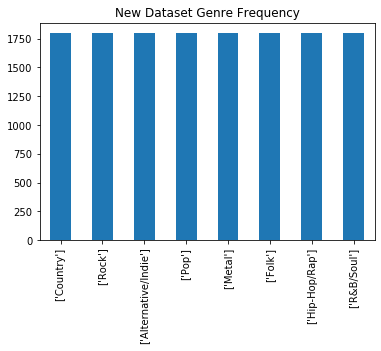

In [5]:
edf = pd.read_csv('dataset.csv')
edf_genre_count = edf['Genre'].value_counts()
# print(odf_genre_count)
edf_genre_count.plot(kind="bar", title="New Dataset Genre Frequency")

## Finding the most common words for each genre

In [30]:
corpus_rap = []
corpus_pop = []
corpus_rock = []
corpus_folk = []
corpus_country = []
corpus_metal = []
corpus_indie = []
corpus_rb = []
lyrics = edf['Lyrics']
sw = stopwords.words("english")
for i in range(0, len(lyrics)):
    text = re.sub('[^a-zA-Z]', ' ', str(lyrics[i])) # removes special characters
    text = text.lower() # lowercases everything
    text = text.split() # splits words
    text = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in text if not word in set(sw)]
    for word in text:
        value = edf['Genre'][i]
        if value == '[\'Pop\']':
            corpus_pop.append(word)
        elif value == '[\'Rock\']':
            corpus_rock.append(word)
        elif value == '[\'Hip-Hop/Rap\']':
            corpus_rap.append(word)
        elif value == '[\'Country\']':
            corpus_country.append(word)
        elif value == '[\'R&B/Soul\']':
            corpus_rb.append(word)
        elif value == '[\'Metal\']':
            corpus_metal.append(word)
        elif value == '[\'Alternative/Indie\']':
            corpus_indie.append(word)
        elif value == '[\'Folk\']':
            corpus_folk.append(word)

In [31]:
# Printing 10 most common words for each genre
print("Rap: ", Counter(corpus_rap).most_common(10))
print("Pop: ", Counter(corpus_pop).most_common(10))
print("Rock: ", Counter(corpus_rock).most_common(10))
print("Folk: ", Counter(corpus_folk).most_common(10))
print("Country: ", Counter(corpus_country).most_common(10))
print("Metal: ", Counter(corpus_metal).most_common(10))
print("Indie: ", Counter(corpus_indie).most_common(10))
print("R&B: ", Counter(corpus_rb).most_common(10))

Rap:  [('get', 13637), ('like', 7291), ('nigga', 6552), ('niggas', 5331), ('know', 4975), ('bitch', 4810), ('fuck', 4736), ('shit', 3829), ('go', 3756), ('yeah', 3686)]
Pop:  [('get', 4161), ('love', 3435), ('know', 2995), ('oh', 2951), ('go', 2539), ('like', 2365), ('say', 1984), ('yeah', 1889), ('baby', 1844), ('come', 1840)]
Rock:  [('get', 4186), ('know', 3034), ('go', 2941), ('like', 2401), ('love', 2313), ('say', 2136), ('time', 1940), ('make', 1762), ('take', 1699), ('come', 1663)]
Folk:  [('go', 2780), ('know', 2505), ('get', 2347), ('oh', 2269), ('love', 2120), ('come', 2073), ('say', 1906), ('like', 1813), ('see', 1551), ('one', 1325)]
Country:  [('get', 4027), ('love', 3093), ('go', 2861), ('know', 2567), ('like', 2477), ('say', 1819), ('yeah', 1779), ('oh', 1747), ('time', 1528), ('come', 1492)]
Metal:  [('get', 2854), ('know', 2600), ('go', 2333), ('time', 2242), ('like', 2050), ('never', 1913), ('take', 1898), ('see', 1868), ('come', 1832), ('one', 1701)]
Indie:  [('get',

## Frequency Analysis on the release dates of the songs

In [6]:
date_count = edf['Date'].value_counts()
#print(date_count)
# date_count[0:20].plot(kind="bar", color="red", title="Genre")
singer_count = edf['Singer'].value_counts()
#print(singer_count)
#singer_count[0:20].plot(kind="bar", color="red", title="Singers")

## Error Bars for the accuracy scores of the neural networks

In [106]:
import numpy as np

cnn_train = np.array([57.88, 58.17, 59.01, 58.91, 58.29, 58.23, 57.67, 58.40, 58.79, 58.39])
cnn_test = np.array([48.56, 48.37, 48.19, 47.54, 48.75, 47.82, 48.19, 47.96, 46.01, 47.64])
cnn_val = np.array([47.01, 46.45, 47.90, 48.04, 47.48, 47.71, 47.11, 46.69, 48.13, 48.37])
nn_train = np.array([54.79, 54.74, 54.46, 54.50, 54.21, 55.11, 54.31, 54.12, 55.00, 54.37])
nn_val = np.array([54.01, 53.97, 54.15, 54.30, 53.83, 54.48, 54.76, 53.64, 54.58, 53.45])
nn_test = np.array([54.48, 55.03, 54.79, 55.12, 55.19, 55.83, 55.00, 54.07, 55.23, 55.42])

In [107]:
# Calculate the average
cnn_train_mean = np.mean(cnn_train)
cnn_test_mean = np.mean(cnn_test)
cnn_val_mean = np.mean(cnn_val)
nn_train_mean = np.mean(nn_train)
nn_test_mean = np.mean(nn_test)
nn_val_mean = np.mean(nn_val)

In [108]:
# Calculate the standard deviation
cnn_train_std = np.std(cnn_train)
cnn_test_std = np.std(cnn_test)
cnn_val_std = np.std(cnn_val)
nn_train_std = np.std(nn_train)
nn_test_std = np.std(nn_test)
nn_val_std = np.std(nn_val)

In [109]:
# Create lists for the plot
sets = ['CNN Train', 'CNN Val', 'CNN Test', 'ANN Train', 'ANN Val', 'ANN Test',]
x_pos = np.arange(len(sets))
CTEs = [cnn_train_mean, cnn_val_mean, cnn_test_mean, nn_train_mean, nn_val_mean, nn_test_mean]
error = [cnn_train_std, cnn_val_std, cnn_test_std, nn_train_std, nn_val_std, nn_test_std]

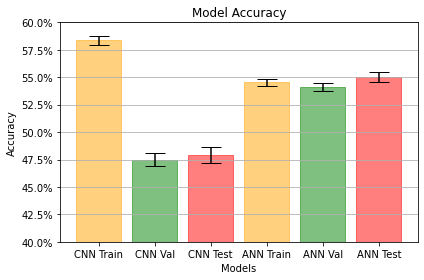

In [110]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Build the plot
fig, ax = plt.subplots()
plot = ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(sets)
ax.set_title('Model Accuracy')
ax.yaxis.grid(True)
plot[0].set_color('orange')
plot[1].set_color('green')
plot[2].set_color('red')
plot[3].set_color('orange')
plot[4].set_color('green')
plot[5].set_color('red')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_ylim([40,60])

# Save the figure and show
plt.tight_layout()
plt.savefig('nn_error_bars.png')
plt.show()

In [93]:
print(cnn_test_mean)

47.903
